# Regressionsanalys med kontrollvariabler

En stor styrka med regressionsanalysen är att man kan kontrollera samband för alternativa förklaringar. Du har antagligen hört uttrycket "korrelation är inte kausalitet." Det innebär att bara för att vi kan se att två variabler hänger ihop betyder det inte att den ena har orsakat den andra.

Det ska sägas att det inte finns någon statistisk metod som kan bevisa att kausalitet föreligger. Däremot kan vi göra det mer eller mindre troligt. Och allra minst kan vi undersöka om ett samband är ett skensamband (spuiröst, med ett annat ord), som egentligen orsakas av andra faktorer.

För att ta ett simpelt exempel. Tänk att vi vill undersöka effekten av en människas längd på hur snabbt personen springer. Som data tar vi tiderna för alla som sprang OS-finaler 2016. Vi kommer då finna att de som var längre sprang snabbare, i genomsnitt. Sambandet är faktiskt ganska starkt.

Om det vore ett orsakssamband - till exempel för att det går snabbare om man har långa ben - skulle vi uppmuntra långa ungdomar att satsa på löpträning.

Men det vore oklokt, utan att ta hänsyn till andra möjliga bakomliggande variabler, som kan tänkas påverka både längd och löphastighet. Den uppenbara variabeln är kön. I genomsnitt är män längre än kvinnor, och har också andra fysiologiska förutsättningar som gör att de kan springa snabbare. Om vi inte tar hänsyn till löparnas kön missar vi det.

Att "kontrollera" för variabeln kön innebär i princip att vi jämför män med män, och kvinnor med kvinnor. Vi undersöker då om det är så att långa kvinnor springer snabbare än korta kvinnor, och om långa män springer snabbare än kortare män. Och om man gör analysen (jag har provat!) så kommer man se att det då inte kvarstår något samband mellan längd och löphastighet. Sambandet mellan längd och hastighet var spuriöst.

Om det hade kvarstått ett samband mellan längd och hastighet även under kontroll för kön hade det inte betytt att det funnits ett kausalt samband, men det hade i alla fall gjort det mindre osannolikt.

## Ett exempel med relevant data

Vi börjar med att ladda in datamängden, som i det här fallet är QoG Basic, med information om världens länder. Analysenheten är land, och så har vi information om länderna i variablerna. <a href="https://qog.pol.gu.se/data/datadownloads/qogbasicdata">Datamängden finns att ladda ned här.</a>

In [23]:
use "qog_bas_cs_jan18.dta", clear

(Quality of Government Basic dataset 2018 - Cross-Section)


I kommandot måste man skriva in sökvägen till var man har datamängden på datorn, till exempel "/Users/anders/data/qog_bas_cs_jan18.dta", annars kommer det inte fungera.

Datamängden har en mängd olika variabler. Vi ska kolla på sambandet mellan demokrati och förväntad livslängd. Är det så att folk lever längre i mer demokratiska länder, och i så fall, är det på grund av att de är demokratiska, eller beror det på något annat? Man skulle till exempel kunna tänka att demokratin gör att staten tar bättre hand om sina medborgare.

Som beroende variabel har vi ett mått på förväntad livslängd, wdi_lifexp, och som oberoende ska vi ha graden av demokrati som mät enligt Polity-projektet. Vi kan börja med att ta fram några grundfakta genom att skriva:

In [4]:
sum wdi_lifexp p_polity2


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  wdi_lifexp |        185    71.25413    8.138066   50.59105   83.58781
   p_polity2 |        165    4.072727    6.158044        -10         10


Vi ser då att vi har information om 185 länder, och att den förväntade livslängden i genomsnitt är 71,25 år. Vi har däremot bara information om graden av demokrati för 165 länder. Våra analyser baseras bara på de länder där vi har all information.

Demokrativariabeln går från -10 (max diktatur) till +10 (max demokrati), med ett medelvärde på 4,07.

Nu är det dags att göra en regressionsanalys. Det gör vi genom att skriva:

In [6]:
reg wdi_lifexp p_polity2


      Source |       SS           df       MS      Number of obs   =       164
-------------+----------------------------------   F(1, 162)       =     14.93
       Model |  961.395196         1  961.395196   Prob > F        =    0.0002
    Residual |  10432.0079       162  64.3951106   R-squared       =    0.0844
-------------+----------------------------------   Adj R-squared   =    0.0787
       Total |  11393.4031       163  69.8981786   Root MSE        =    8.0247

------------------------------------------------------------------------------
  wdi_lifexp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   p_polity2 |   .3942974   .1020468     3.86   0.000      .192784    .5958109
       _cons |   69.20107   .7498878    92.28   0.000     67.72025    70.68188
------------------------------------------------------------------------------


Här ser vi nu många intressanta saker. Det viktigaste är b-koefficienten för demokrativariabeln, som vi ser i kolumnen "Coef." Den är 0,39. Det betyder att för varje steg vi tar uppåt på demokrativariabeln ökar livslängden i genomsnitt med 0,39 år. Sambandet är statistiskt signifikant, ser vi i kolumnen "P>|t", eftersom signifikansvärdet är under 0,050.

Uppe till höger, ser vi att "R-squared = 0.0844". Det betyder att variablerna i modellen - alltså bara demokrati - förklarar 8,4% av variationen i den beroende variabeln. Inte jättemycket, men något. Här finns det inga specifika tröskelvärden att förhålla sig till.

Om vi istället vill titta på sambandet kan vi skriva såhär:

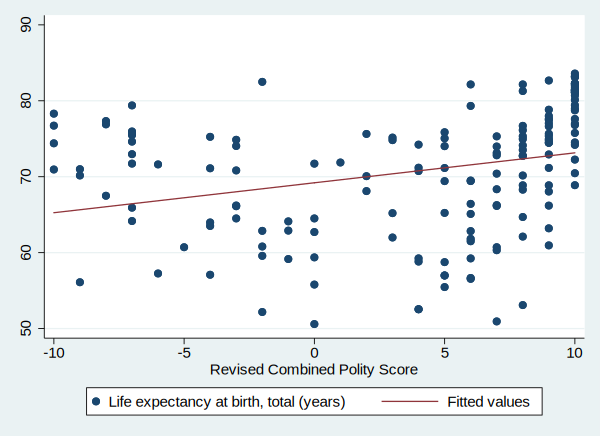

In [7]:
twoway (scatter wdi_lifexp p_polity2) (lfit wdi_lifexp p_polity2)

Vi ser att den röda regressionslinjen lutar svagt uppåt, vilket regressionsanalysen ovan också visade. Men vi ser också att linjen inte passar särskilt väl till punkterna - de är spridda mycket kring linjen. Det förklarar det låga R2-värdet.

Betyder det positiva samband som vi hittat att demokrati gör att livslängden ökar? Det är inte säkert. Det kan finnas annat som gör att ett land både är demokratiskt och har en hög livslängd. Demokrati och långa liv kan vara två symptom, snarare än orsak och verkan.

Den uppenbara kandidaten är nivån av ekonomisk utveckling. Demokratiforskning visar att länder med högre ekonomiskt välstånd har lättare att demokratisera och behålla demokratin. Rika länder har också råd att finansiera mer sjukvård och förebygga sjukdomar som kommer av till exempel undermålig vattenförsörjning eller avfallshantering.

För att bättre pröva hypotesen att demokrati leder till ökad livslängd ska vi alltså kontrollera för ekonomisk utveckling. Ett standardmått på det är BNP per capita:

In [14]:
sum gle_rgdpc


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
   gle_rgdpc |        192     12596.3     15803.7     285.95   95696.97


Variabeln gle_rgdpc visar ett lands BNP per capita i dollar. Medelvärdet är 12596 dollar, men det fattigaste landet (Kongo-Kinshasa) har bara knappa 286, medan det rikaste (Monaco) har hela 95697.

För att säkerställa att det är en relevant kontrollvariabel, och att vi har tänkt rätt, kan vi titta på de bivariata korrelationerna mellan kontrollvariabeln, demokrati och förväntad livslängd. Det gör vi genom att skriva:

In [17]:
pwcorr gle_rgdpc p_polity2 wdi_lifexp


             | gle_rg~c p_poli~2 wdi_li~p
-------------+---------------------------
   gle_rgdpc |   1.0000 
   p_polity2 |   0.1512   1.0000 
  wdi_lifexp |   0.6329   0.2905   1.0000 


I den här matrisen ser vi nu tre olika samband, standardiserade enligt ett mått som går från -1 (perfekt negativt samband) till +1 (perfekt positivt samband). Sambandet mellan demokrati (p_polity2) och BNP (gle_rgdpc) är 0,15. Mer BNP per capita hänger ihop med mer demokrati, och mer demokrati hänger ihop med mer BNP per capita. Demokratiska länder är alltså rikare, i genomsnitt.

Hög BNP per capita hänger också ihop med en högre förväntad livslängd. Sambandet är också väldigt starkt, 0,63. Det är betydligt mer än sambandet mellan demokrati och livslängd (0,29).

När man kontrollerar för variabler som har en positiv korrelation med både beroende och oberoende variabel kommer det ursprungliga sambandet att gå nedåt. Detsamma gäller om man kontrollerar för en variabel som har en negativ korrelation med både beroende och oberoende. Det är alltså troligt att sambandet mellan demokrati och livslängd minskar under kontroll för BNP per capita.

Omvänt kommer det ursprungliga sambandet gå uppåt om vi kontrollerar för något som har en positiv korrelation med den beroende och en negativ med den oberoende. Huvudsambandet går också uppåt om vi kontrollerar för något som har en negativ korrelation med den beroende och en positiv korrelation med den obereonde.

Genom att göra en regressionsanalys där både demokrati och BNP per capita ingår kan vi, enkelt uttryckt,jämföra rika demokratier med rika ickedemokratier, och fattiga demokratier med fattiga ickedemokratier. Jämförelsen blir mer rättvis. Kommer det då kvarstå något samband mellan demokrati och livslängd?

När vi ska göra analysen skriver vi exakt som tidigare, men lägger bara till gle_rgpdc efter p_polity2. Vill man lägga till fler variabler är det bara att skriva dit dem också.

In [18]:
reg wdi_lifexp p_polity2 gle_rgdpc


      Source |       SS           df       MS      Number of obs   =       162
-------------+----------------------------------   F(2, 159)       =     67.06
       Model |  5087.66756         2  2543.83378   Prob > F        =    0.0000
    Residual |  6031.42779       159  37.9335081   R-squared       =    0.4576
-------------+----------------------------------   Adj R-squared   =    0.4507
       Total |  11119.0954       161  69.0627041   Root MSE        =     6.159

------------------------------------------------------------------------------
  wdi_lifexp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   p_polity2 |   .2590328   .0796837     3.25   0.001     .1016577    .4164078
   gle_rgdpc |   .0003713   .0000353    10.53   0.000     .0003017     .000441
       _cons |   65.53559   .6865968    95.45   0.000     64.17957    66.89162
--------------------------------------------------

Vad hände med det ursprungliga sambandet? Koefficienten sjönk från 0,39 till 0,26. Men det är fortfarande positivt, och statistiskt signifikant. Men en del av det ursprungliga sambandet berodde alltså på att de demokratiska länderna i genomsnitt är rikare. När vi håller graden av ekonomisk utveckling konstant är sambandet inte lika tydligt.

Koefficienten för BNP per capita är som väntat positiv. En ökning av BNP per capita med en dollar hänger ihop med en förväntad ökning av livslängden med 0,00037 år. Det låter inte så mycket, men en dollars ökning är inte heller så mycket. Ökar vi BNP per capita med 10000 dollar blir det 3,7 år istället, vilket är ganska mycket.

R2 har också ökat kraftigt jämfört med modellen med bara demokrati. Tillsammans förklarar demokrati och BNP per capita 45,7% av variationen i den beroende variabeln. Framförallt beror det på BNP-variabelns stora förklaringskraft. Man lever mycket längre i rikare länder.

Slutsatsen är ändå att det kvarstår ett samband mellan demokrati och förväntad livslängd. *Det betyder dock inte att vi nu har visat att det rör sig om en kausal effekt.* Det finns mycket annat relevant att kontrollera för, och i en uppsats bör man definitivt göra det. Men principen är då densamma, man lägger bara till fler variabler i regressionsanalysen.

## Avslutning

Att bevisa att ett samband är kausalt är extremt svårt. Det är synd, eftersom det oftast är det vi behöver för att kunna utfärda rekommendationer, oavsett om det handlar om hälsoråd eller politik.

Men regressionsanalys med kontrollvariabler hjälper oss i alla fall att kontrollera för de enklaste fällorna. I det här exemplet kunde vi se att sambandet mellan demokrati och livslängd inte helt berodde på att demokratiska länder är rikare, och att ickedemokratiska länder är fattigare. Vi har tagit hänsyn till en alternativ förklaring till det ursprungliga sambandet.

Man bör dock tänka igenom vilka kontrollvariabler man tar med i sin analys. Analysen blir inte bättre eller mer sofistikerad bara för att man kontrollerar för många variabler. Man ska till exempel inte (i det här sammanhanget) kontrollera för variabler som kommer efter i orsakskedjan. Det vill säga, om demokrati orsakar något som i sin tur leder till högre livslängd ska vi inte kontrollera för det. För att utesluta alternativa förklaringar ska vi bara kontrollera för sådant som kommer före både oberoende och beroende variabel.

Det kan också vara bra att i sina analyser lägga till en kontrollvariabel i taget, för att se hur huvudsambandet förändras. På så vis får man själv bättre koll på vad som händer, och kan tänka teoretiskt kring det. Hur man sedan presenterar resultatet är en annan fråga, där behöver man inte alltid redovisa alla stegen.